In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from scipy.stats import f_oneway

In [62]:
df = pd.read_excel(r'C:/Users/ankit/Aventus/Hackathon_Data - Anonymised- v2.xlsx')
df.head()

,Unique ID,Age,Gender,BCLOT,A/G RAT,DBIL,IBIL,TBIL,TGLO,TREP,ALB,GGT,SGOT,SGPT,ALKPO4
0,NaN,NaN,NaN,TOTAL CHOLESTEROL,ALBUMIN:GLOBULIN RATIO,DIRECT BILIRUBIN,INDIRECT BILIRUBIN,TOTAL BILIRUBIN,GLOBULIN,TOTAL PROTEINS,ALBUMIN (Colorimetric - BCG Dye binding),GAMMA G.T,Aspartate Aminotransferase AST (S.G.O.T),Alanine Aminotransferase ALT (S.G.P.T),ALKALINE PHOSPHATASE
1,1.0,73.0,M,358,1.15,0.4,0.8,1.2,3.4,7.3,3.9,25,26,32,58
2,2.0,22.0,M,172,1.85,0.42,0.68,1.1,2.42,6.9,4.48,20,27,30,61
3,3.0,36.0,F,166,1.48,0.11,0.2,0.31,2.82,7,4.18,16,28,36,97
4,4.0,52.0,F,213,1.26,0.3,0.3,0.6,3.5,7.9,4.4,16,20,28,89


In [63]:
df.drop(0, inplace=True)

In [69]:
df.drop(axis=1, columns='Unique ID', inplace=True)
df.head()

,Age,Gender,BCLOT,AGR,DBIL,IBIL,TBIL,TGLO,TREP,ALB,GGT,SGOT,SGPT,ALKPO4
1,73.0,M,358,1.15,0.4,0.8,1.2,3.4,7.3,3.9,25,26,32,58
2,22.0,M,172,1.85,0.42,0.68,1.1,2.42,6.9,4.48,20,27,30,61
3,36.0,F,166,1.48,0.11,0.2,0.31,2.82,7,4.18,16,28,36,97
4,52.0,F,213,1.26,0.3,0.3,0.6,3.5,7.9,4.4,16,20,28,89
5,35.0,F,187,1.24,0.11,0.17,0.28,3.48,7.8,4.32,39,20,18,105


In [65]:
df.iloc[269652]
df.drop(269653, inplace=True)

In [66]:
df.isnull().sum()

Unique ID    0
Age          0
Gender       0
BCLOT        0
A/G RAT      0
DBIL         0
IBIL         0
TBIL         0
TGLO         0
TREP         0
ALB          0
GGT          0
SGOT         0
SGPT         0
ALKPO4       0
dtype: int64

In [67]:
df.rename(columns = {'A/G RAT':'AGR'}, inplace = True)

In [70]:
df.head()

,Age,Gender,BCLOT,AGR,DBIL,IBIL,TBIL,TGLO,TREP,ALB,GGT,SGOT,SGPT,ALKPO4
1,73.0,M,358,1.15,0.4,0.8,1.2,3.4,7.3,3.9,25,26,32,58
2,22.0,M,172,1.85,0.42,0.68,1.1,2.42,6.9,4.48,20,27,30,61
3,36.0,F,166,1.48,0.11,0.2,0.31,2.82,7,4.18,16,28,36,97
4,52.0,F,213,1.26,0.3,0.3,0.6,3.5,7.9,4.4,16,20,28,89
5,35.0,F,187,1.24,0.11,0.17,0.28,3.48,7.8,4.32,39,20,18,105


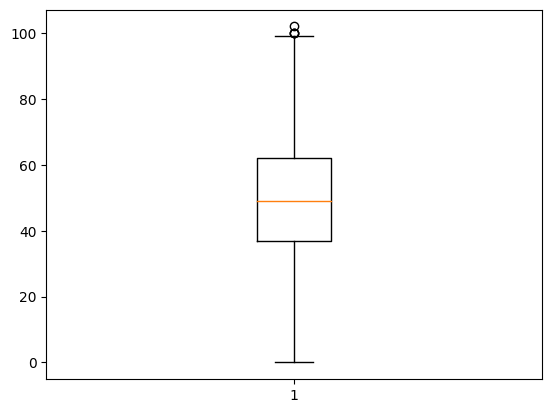

In [6]:
y = list(df.Age)
plt.boxplot(y)
plt.show()

In [7]:
result=df.dtypes
print(result)

Unique ID    float64
Age          float64
Gender        object
BCLOT         object
A/G RAT       object
DBIL          object
IBIL          object
TBIL          object
TGLO          object
TREP          object
ALB           object
GGT           object
SGOT          object
SGPT          object
ALKPO4        object
dtype: object


In [104]:
cols=['Age', 'BCLOT', 'AGR', 'DBIL', 'IBIL',
       'TBIL', 'TGLO', 'TREP', 'ALB', 'GGT', 'SGOT', 'SGPT', 'ALKPO4']
for col in cols:
    df[col]= df[col].apply(pd.to_numeric)
print(df.dtypes)

Age       float64
Gender     object
BCLOT     float64
AGR       float64
DBIL      float64
IBIL      float64
TBIL      float64
TGLO      float64
TREP      float64
ALB       float64
GGT       float64
SGOT      float64
SGPT      float64
ALKPO4    float64
dtype: object


In [26]:
df['BCLOT'].describe()

count    331565.000000
mean        188.817710
std          64.104912
min           0.000000
25%         150.000000
50%         180.000000
75%         213.000000
max        1594.000000
Name: BCLOT, dtype: float64

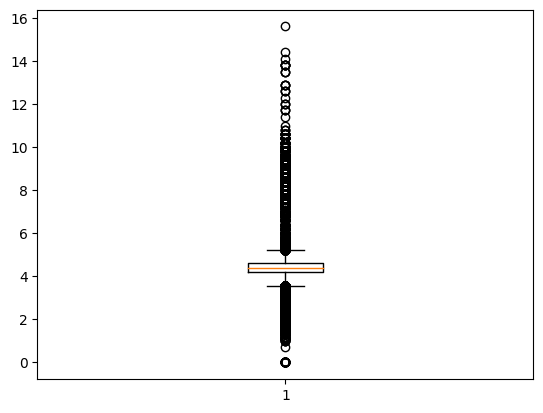

In [48]:
y = list(df.ALB)
plt.boxplot(y)  
plt.show()

<AxesSubplot:>

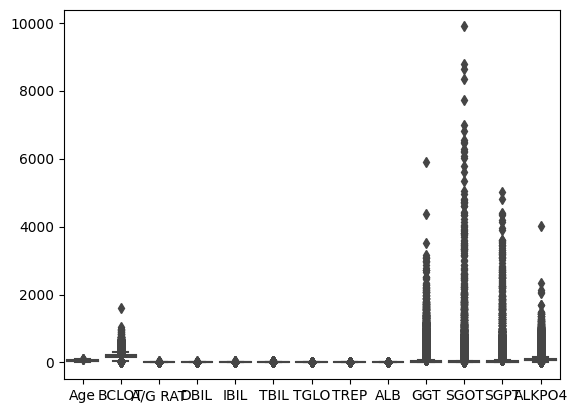

In [33]:
sb.boxplot(data = df)

In [49]:
matrix = df.corr()
print("Correlation matrix is : ")
print(matrix)


C:\Users\ankit\AppData\Local\Temp\ipykernel_5088\1382066185.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


Correlation matrix is : 
             Age     BCLOT       AGR      DBIL      IBIL      TBIL      TGLO  \
Age     1.000000 -0.024098 -0.100791 -0.021354 -0.095070 -0.066213  0.033771   
BCLOT  -0.024098  1.000000 -0.079890 -0.054302 -0.024787 -0.049258  0.185400   
AGR    -0.100791 -0.079890  1.000000 -0.113423  0.039990 -0.053083 -0.752329   
DBIL   -0.021354 -0.054302 -0.113423  1.000000  0.364803  0.859465  0.082927   
IBIL   -0.095070 -0.024787  0.039990  0.364803  1.000000  0.787713 -0.031633   
TBIL   -0.066213 -0.049258 -0.053083  0.859465  0.787713  1.000000  0.037411   
TGLO    0.033771  0.185400 -0.752329  0.082927 -0.031633  0.037411  1.000000   
TREP   -0.094159  0.255691 -0.251897 -0.101502 -0.053081 -0.096484  0.691812   
ALB    -0.081226  0.384277  0.193599 -0.128059 -0.031388 -0.101911  0.025676   
GGT    -0.015219  0.037089 -0.091620  0.263566  0.109662  0.234849  0.088136   
SGOT   -0.058185 -0.040571 -0.035796  0.231162  0.088444  0.200951  0.012190   
SGPT   -0.09572

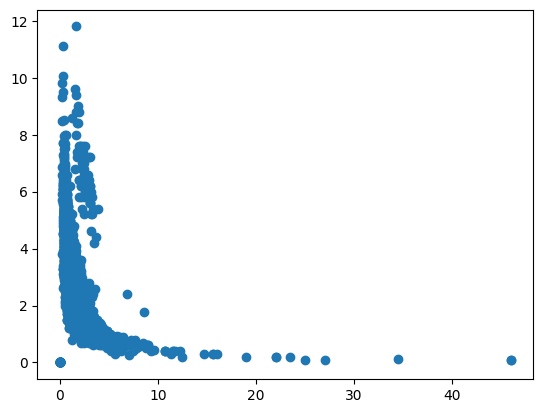

In [53]:
plt.scatter(df.AGR, df.TGLO)

In [118]:
df.head()
df['SGOT'].describe()

count    331565.000000
mean         31.498254
std          86.230070
min           0.000000
25%          19.000000
50%          23.000000
75%          30.000000
max        9889.500000
Name: SGOT, dtype: float64

In [71]:
df1 = df[df['Gender'] == 'M']
df1.drop(axis=1, columns='Gender', inplace=True)
df1.head()

C:\Users\ankit\AppData\Local\Temp\ipykernel_5088\3999611714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(axis=1, columns='Gender', inplace=True)


,Age,BCLOT,AGR,DBIL,IBIL,TBIL,TGLO,TREP,ALB,GGT,SGOT,SGPT,ALKPO4
1,73.0,358,1.15,0.4,0.8,1.2,3.4,7.3,3.9,25,26,32,58
2,22.0,172,1.85,0.42,0.68,1.1,2.42,6.9,4.48,20,27,30,61
7,68.0,216,1.24,0.17,0.38,0.55,3.27,7.31,4.04,60,71,56,77
8,33.0,140,1.66,0.19,0.45,0.64,2.59,6.88,4.29,13,21,40,100
9,65.0,174,1.58,0.17,0.36,0.53,2.5,6.46,3.96,13,17,14,139


In [72]:
df2 = df[df['Gender'] == 'F']
df2.drop(axis=1, columns='Gender', inplace=True)
df2.head()

C:\Users\ankit\AppData\Local\Temp\ipykernel_5088\1193654110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(axis=1, columns='Gender', inplace=True)


,Age,BCLOT,AGR,DBIL,IBIL,TBIL,TGLO,TREP,ALB,GGT,SGOT,SGPT,ALKPO4
3,36.0,166,1.48,0.11,0.2,0.31,2.82,7,4.18,16,28,36,97
4,52.0,213,1.26,0.3,0.3,0.6,3.5,7.9,4.4,16,20,28,89
5,35.0,187,1.24,0.11,0.17,0.28,3.48,7.8,4.32,39,20,18,105
6,54.0,207,1.36,0.18,0.35,0.53,3.14,7.41,4.27,32,47,56,90
12,47.0,182,1.24,0.11,0.21,0.32,3.3,7.4,4.1,11,21,14,57


In [112]:
cols=['Age', 'BCLOT', 'AGR', 'DBIL', 'IBIL',
       'TBIL', 'TGLO', 'TREP', 'ALB', 'GGT', 'SGOT', 'SGPT', 'ALKPO4']
for col in cols:
    df1[col]= df1[col].apply(pd.to_numeric)
    df2[col]= df2[col].apply(pd.to_numeric)

df1_bclot=pd.DataFrame(df1['SGOT'])
df2_bclot=pd.DataFrame(df2['SGOT'])
print(df2.dtypes)

C:\Users\ankit\AppData\Local\Temp\ipykernel_5088\1750479430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]= df1[col].apply(pd.to_numeric)
C:\Users\ankit\AppData\Local\Temp\ipykernel_5088\1750479430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col]= df2[col].apply(pd.to_numeric)


Age       float64
BCLOT     float64
AGR       float64
DBIL      float64
IBIL      float64
TBIL      float64
TGLO      float64
TREP      float64
ALB       float64
GGT       float64
SGOT      float64
SGPT      float64
ALKPO4    float64
dtype: object


In [113]:
print(df1.dtypes)

Age       float64
BCLOT     float64
AGR       float64
DBIL      float64
IBIL      float64
TBIL      float64
TGLO      float64
TREP      float64
ALB       float64
GGT       float64
SGOT      float64
SGPT      float64
ALKPO4    float64
dtype: object


In [115]:
df1_bclot.describe()

,SGOT
count,183607.000000
mean,34.035384
std,90.881141
min,0.000000
25%,20.000000
50%,25.000000
75%,33.000000
max,8626.200000


In [116]:
df2_bclot.describe()

,SGOT
count,147958.000000
mean,28.349829
std,79.972125
min,0.000000
25%,17.000000
50%,21.000000
75%,27.000000
max,9889.500000


In [119]:
f_oneway(df1_bclot, df2_bclot)

F_onewayResult(statistic=array([356.57646108]), pvalue=array([1.72543348e-79]))